In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import os.path as osp
import numpy as np
from spinup.utils.plot import get_datasets, get_all_datasets, plot_data

In [6]:
datasets, configs = get_all_datasets(['/Users/ppiech/openaigym/spindata/octaves/'])

# Show a sample of the data
pd.concat(datasets, ignore_index=True)

Plotting from...

/Users/ppiech/openaigym/spindata/octaves/



,Epoch,AverageEpRet,StdEpRet,EpLen,GoalPathLen,StabilityReward,StabilityActionError,StabilityGoalError,ForwardPreictionError,GoalDiscount,RewardDiscount,GoalsStepReward,ActionsReward,TotalEnvInteracts,Unit,Condition1,Condition2,Performance
0,0,-1365.64800,106.242990,200.0,1.410557,0.284741,0.306994,0.759583,0.547088,0.356954,0.521850,0.249371,-6.469288,1200,5,octaves_pendulum-v0_ste1200_goa2,octaves_pendulum-v0_ste1200_goa2-41,-1365.64800
1,1,-1220.65930,29.293737,200.0,1.502740,0.381165,0.608216,0.664583,0.315458,0.330040,0.484472,0.303841,-5.667916,2400,5,octaves_pendulum-v0_ste1200_goa2,octaves_pendulum-v0_ste1200_goa2-41,-1220.65930
2,2,-1367.38230,199.003940,200.0,1.353846,0.454308,0.190485,0.555417,0.270873,0.344225,0.486529,0.276271,-6.384411,3600,5,octaves_pendulum-v0_ste1200_goa2,octaves_pendulum-v0_ste1200_goa2-41,-1367.38230
3,3,-1256.44010,59.623333,200.0,1.450490,0.488997,0.152470,0.514167,0.407518,0.317367,0.469082,0.291009,-5.816892,4800,5,octaves_pendulum-v0_ste1200_goa2,octaves_pendulum-v0_ste1200_goa2-41,-1256.44010
4,4,-1277.14660,73.180595,200.0,1.477250,0.514698,0.219493,0.474167,0.341177,0.301833,0.458664,0.300110,-5.873075,6000,5,octaves_pendulum-v0_ste1200_goa2,octaves_pendulum-v0_ste1200_goa2-41,-1277.14660
5,5,-1302.71250,232.744960,200.0,1.390361,0.496530,0.215312,0.497083,0.200498,0.320599,0.450003,0.291537,-5.958775,7200,5,octaves_pendulum-v0_ste1200_goa2,octaves_pendulum-v0_ste1200_goa2-41,-1302.71250
6,6,-1350.14010,233.650620,200.0,1.595443,0.546127,0.269829,0.439167,0.185371,0.312522,0.454487,0.347221,-6.129598,8400,5,octaves_pendulum-v0_ste1200_goa2,octaves_pendulum-v0_ste1200_goa2-41,-1350.14010
7,7,-1262.49870,77.041410,200.0,1.765836,0.611833,0.448261,0.360417,0.178223,0.311755,0.461208,0.432869,-5.560804,9600,5,octaves_pendulum-v0_ste1200_goa2,octaves_pendulum-v0_ste1200_goa2-41,-1262.49870
8,8,-1288.06380,219.113050,200.0,1.586880,0.519431,0.173909,0.470417,0.144001,0.353279,0.439611,0.388736,-5.747214,10800,5,octaves_pendulum-v0_ste1200_goa2,octaves_pendulum-v0_ste1200_goa2-41,-1288.06380
9,9,-1171.76670,84.055920,200.0,1.651507,0.459458,0.335352,0.538750,0.148016,0.399451,0.396203,0.453815,-5.263286,12000,5,octaves_pendulum-v0_ste1200_goa2,octaves_pendulum-v0_ste1200_goa2-41,-1171.76670


In [7]:
# Show table of parameters used in the experiment, used as guide to graph legends

def config_values(config, paths):
    values = []
    for path in paths:
        value = config
        for name in path.split(':'):
            value = value[name]
        values.append(value)
    return values

columns = ['exp_name', 
           'steps_per_epoch',
#           'use_reward_discount',
           'goal_octaves', 
#            'goal_discount_rate', 
#           'no_step_reward', 
#           'finish_action_path_on_new_goal', 
#            'ac_kwargs:hidden_sizes', 
#            'ac_kwargs:activation', 
#            'inverse_kwargs:hidden_sizes', 
#            'inverse_kwargs:activation', 
#            'inverse_kwargs:goals_output_activation'
          ]

data = list(map(lambda config: config_values(config, columns), configs))
df = pd.DataFrame(data=data, columns=columns)
df.drop_duplicates()

,exp_name,steps_per_epoch,goal_octaves
0,octaves_pendulum-v0_ste1200_goa2,1200,2
5,octaves_pendulum-v0_ste1200_goa4,1200,4
10,octaves_pendulum-v0_ste4800_goa6,4800,6
14,octaves_pendulum-v0_ste4800_goa2,4800,2
19,octaves_pendulum-v0_ste4800_goa4,4800,4
23,octaves-6_pendulum-v0,1200,6
28,octaves_pendulum-v0,1200,8


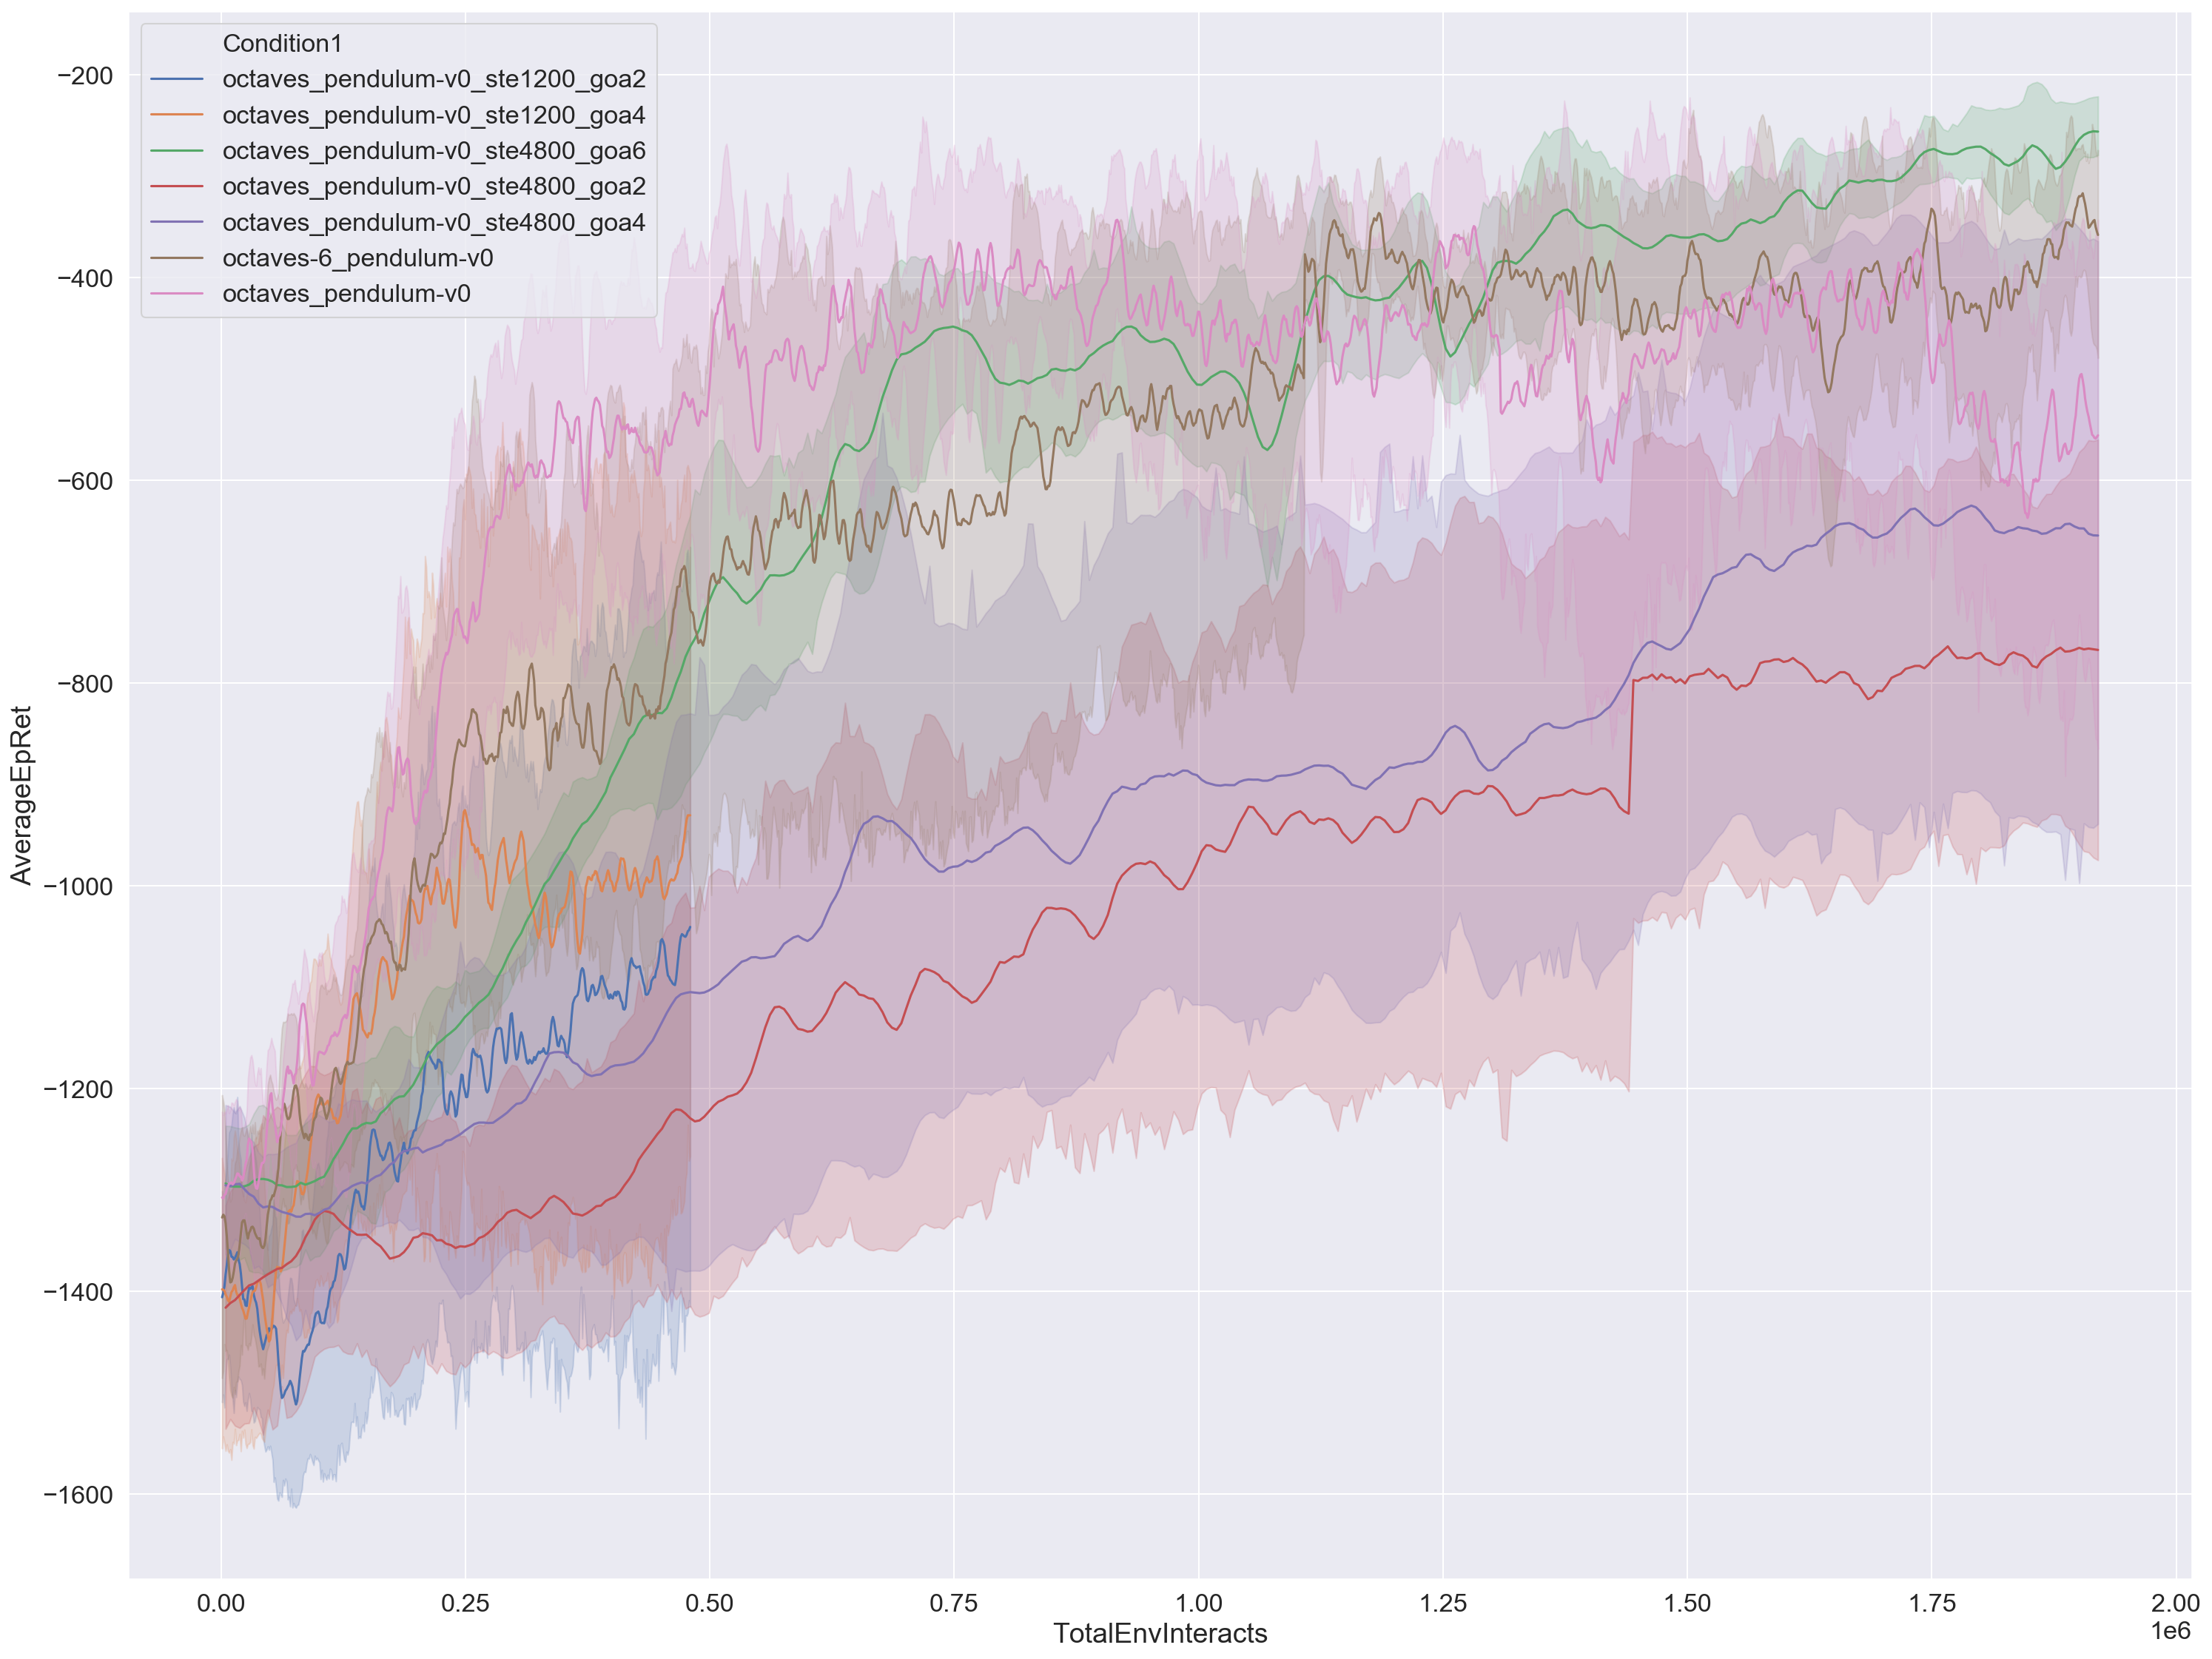

In [9]:
plt.figure(figsize=(20, 15), dpi=150)

# To show individual runs, add arguments: units='Condition2, estimator=None
# To compare runs with different epoch lengts, use:xaxis='TotalEnvInteracts'

plot_data(datasets, smooth=5, xaxis='TotalEnvInteracts')
plt.show()

In [ ]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='StabilityGoalError', smooth=1, show_legend=False, estimator='mean')
plt.show()

In [ ]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='StabilityActionError', smooth=1, show_legend=False)
plt.show()

In [ ]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='GoalDiscount', smooth=1, show_legend=False)
plt.show()

In [ ]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='ActionsEntropy', smooth=1, show_legend=False)
plt.show()

In [ ]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='GoalsEntropy', smooth=1, show_legend=False)
plt.show()